In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Shubham/OneDrive/Desktop/Diwali Sales Data.csv", encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df['Amount'] = df['Amount'].astype('int')

In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Exploratory Data Analysis

### Gender

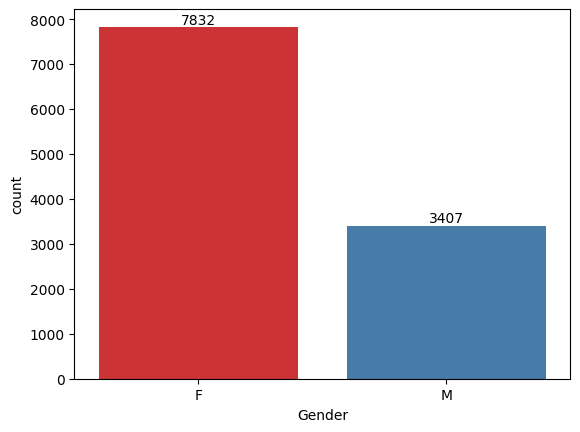

In [11]:
ax = sns.countplot(x = 'Gender',data = df,palette="Set1",hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Gender', ylabel='Amount'>

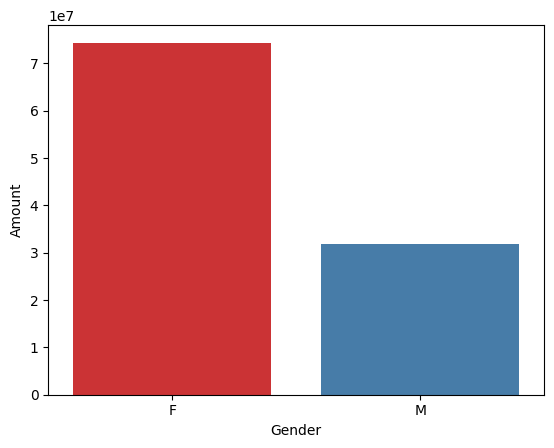

In [12]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen,palette="Set1",hue='Gender')

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

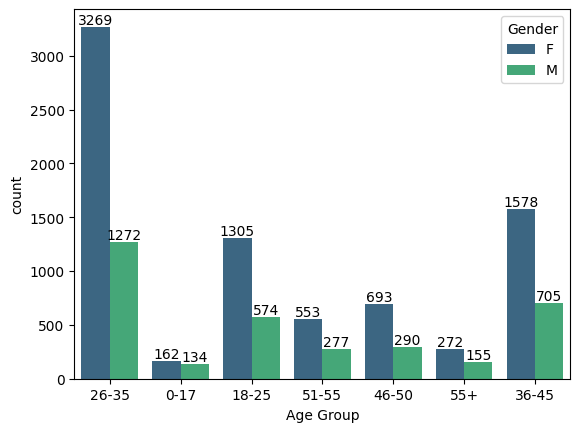

In [13]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',palette="viridis")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

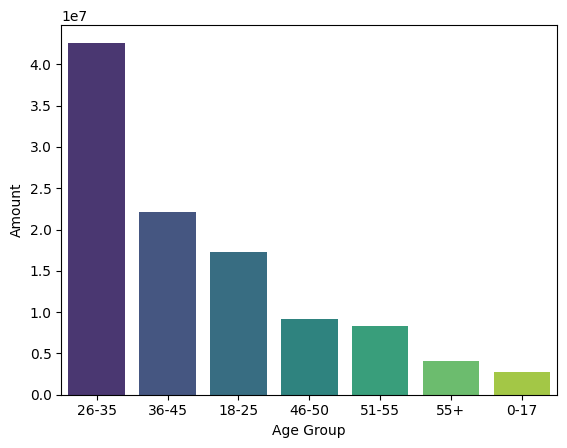

In [14]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,palette='viridis',hue='Age Group')

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

<Axes: xlabel='State', ylabel='Orders'>

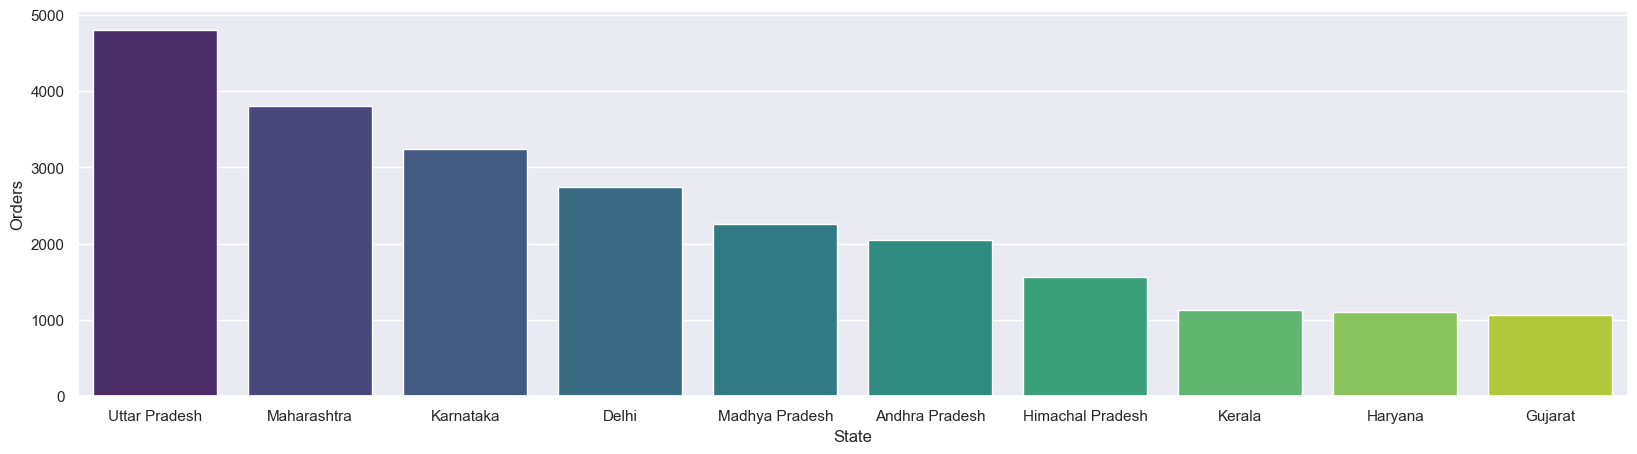

In [15]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders',palette="viridis",hue="State")

<Axes: xlabel='State', ylabel='Amount'>

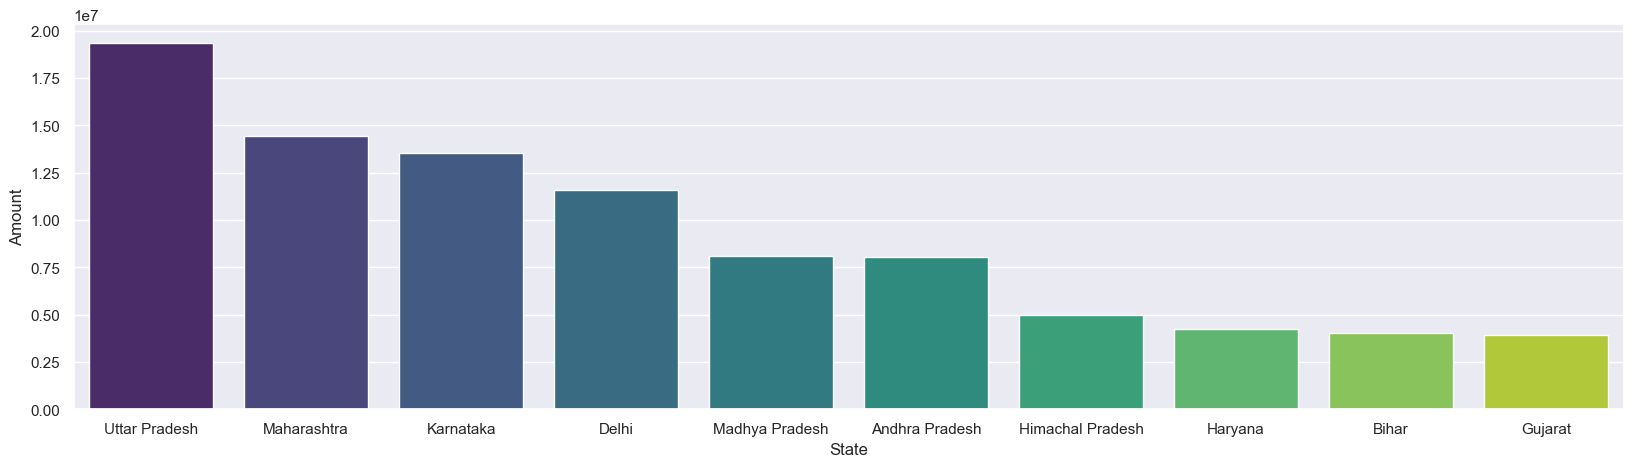

In [16]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',hue="State",palette="viridis")

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

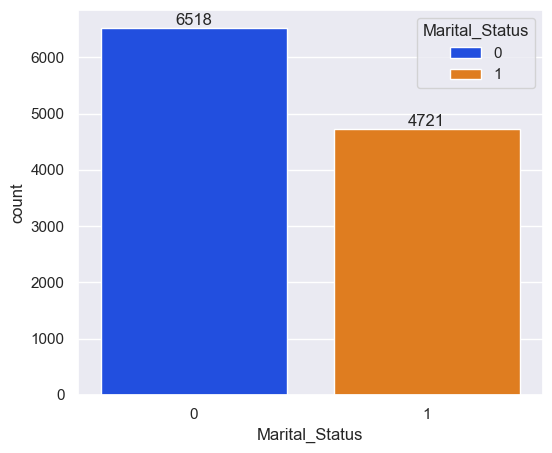

In [31]:
ax = sns.countplot(data = df, x = 'Marital_Status',hue='Marital_Status',palette="bright")

sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

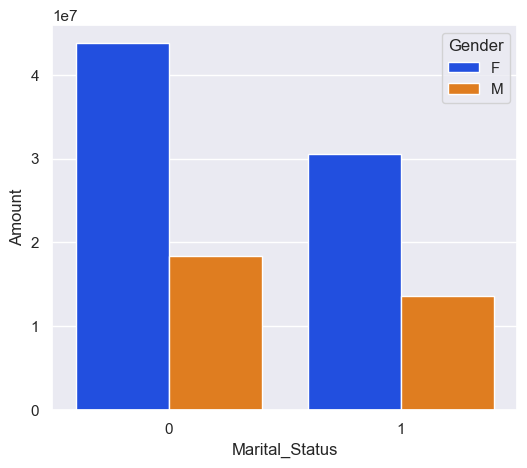

In [30]:
sales_mari = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_mari, x = 'Marital_Status',y= 'Amount', hue='Gender',palette="bright")

*From above graphs we can see that most of the buyers are married women and they have high purchasing power*

### Occupation

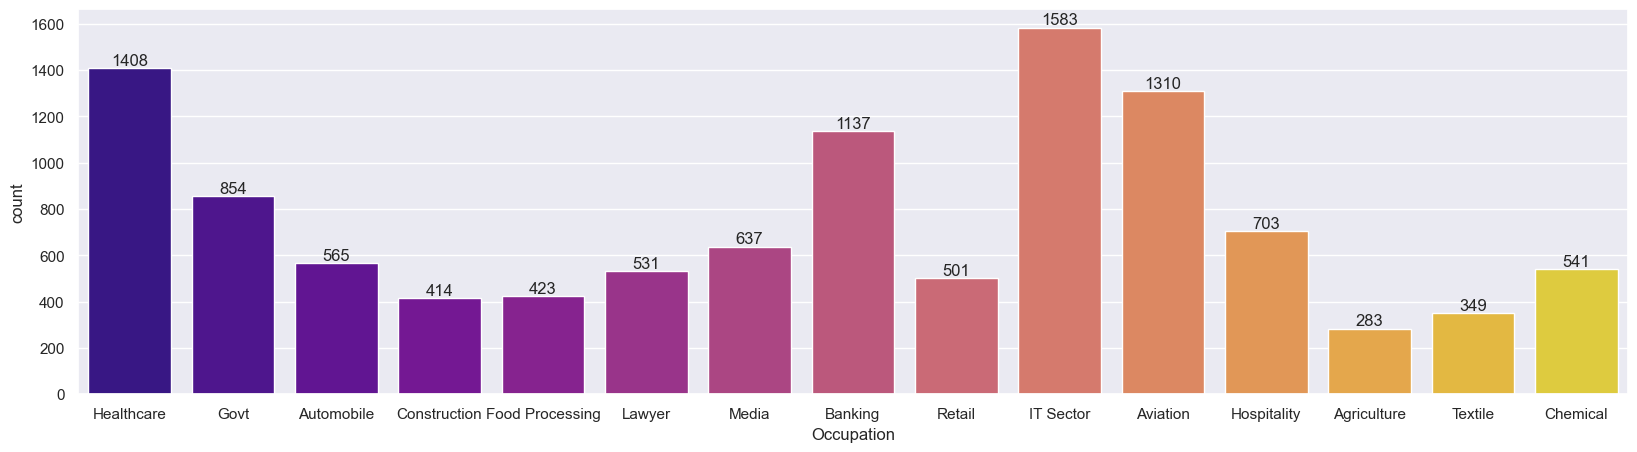

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation',hue='Occupation',palette="plasma")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

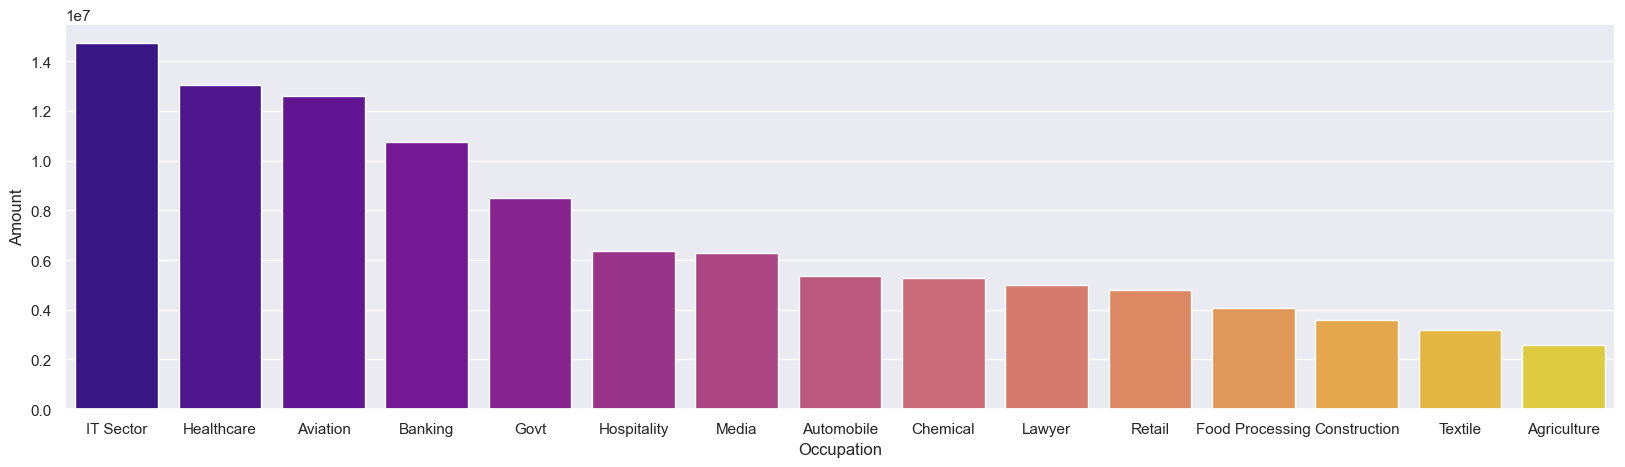

In [20]:
sales_occu = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_occu, x = 'Occupation',y= 'Amount',hue='Occupation',palette="plasma")

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

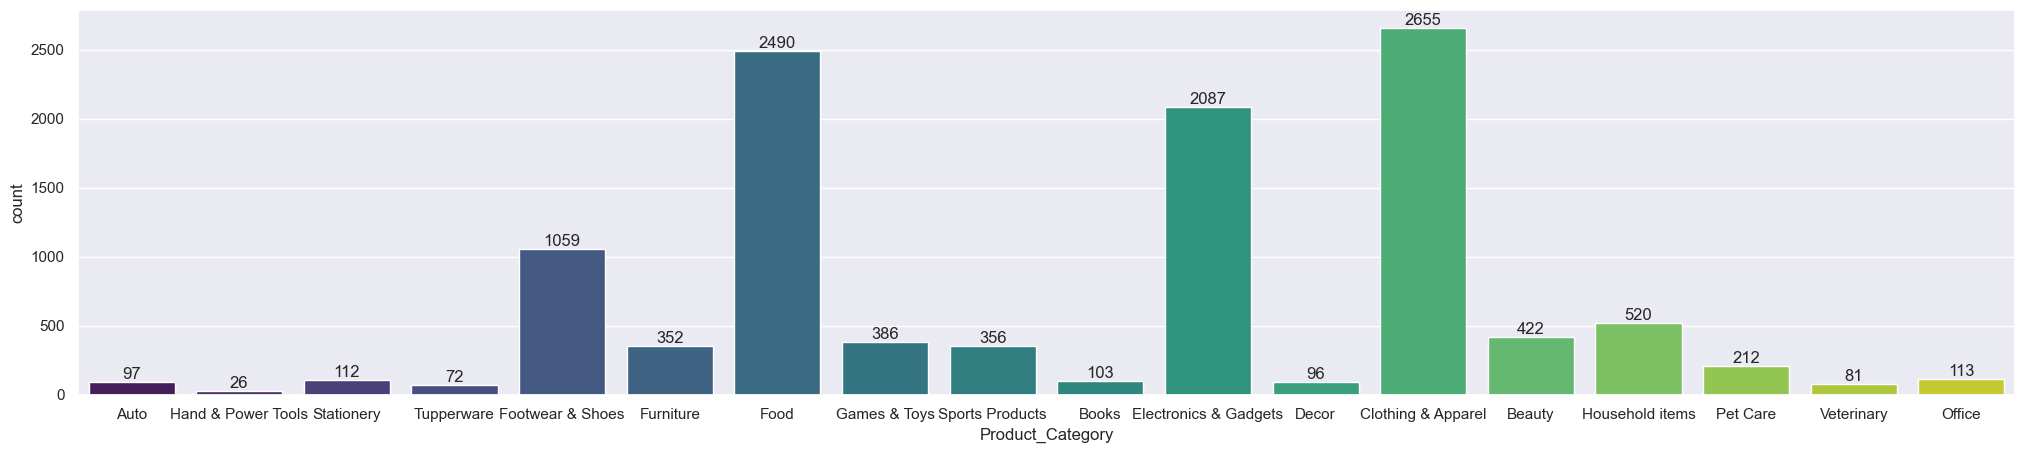

In [21]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category',hue='Product_Category',palette="viridis")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

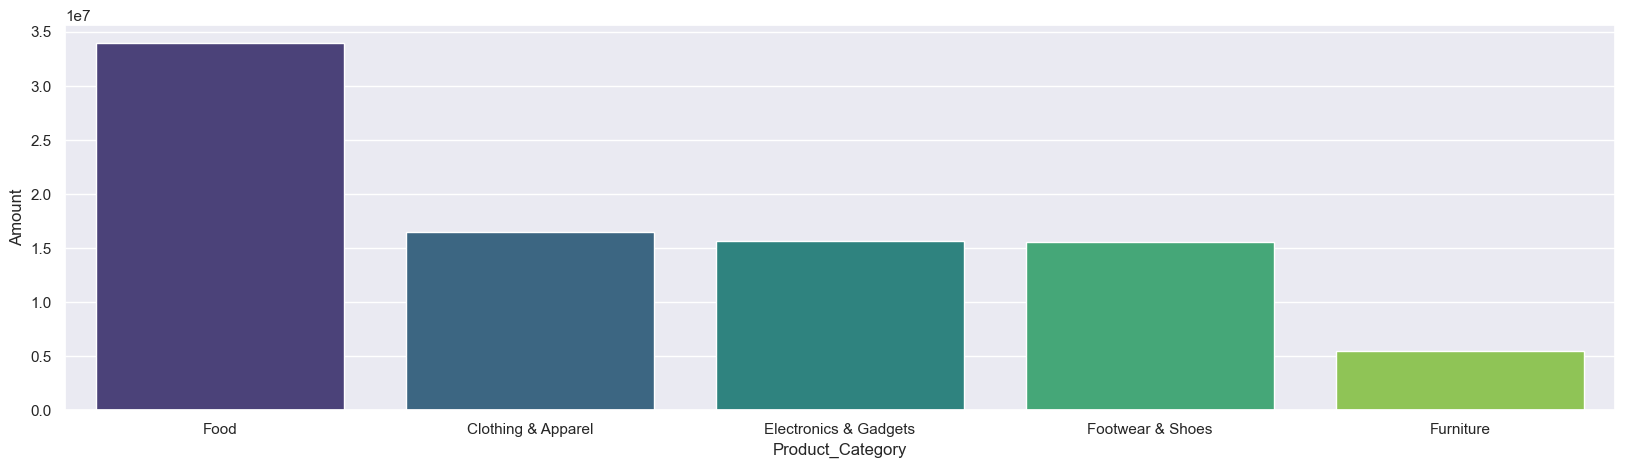

In [22]:
sales_categ = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_categ, x = 'Product_Category',y= 'Amount',hue='Product_Category',palette='viridis')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

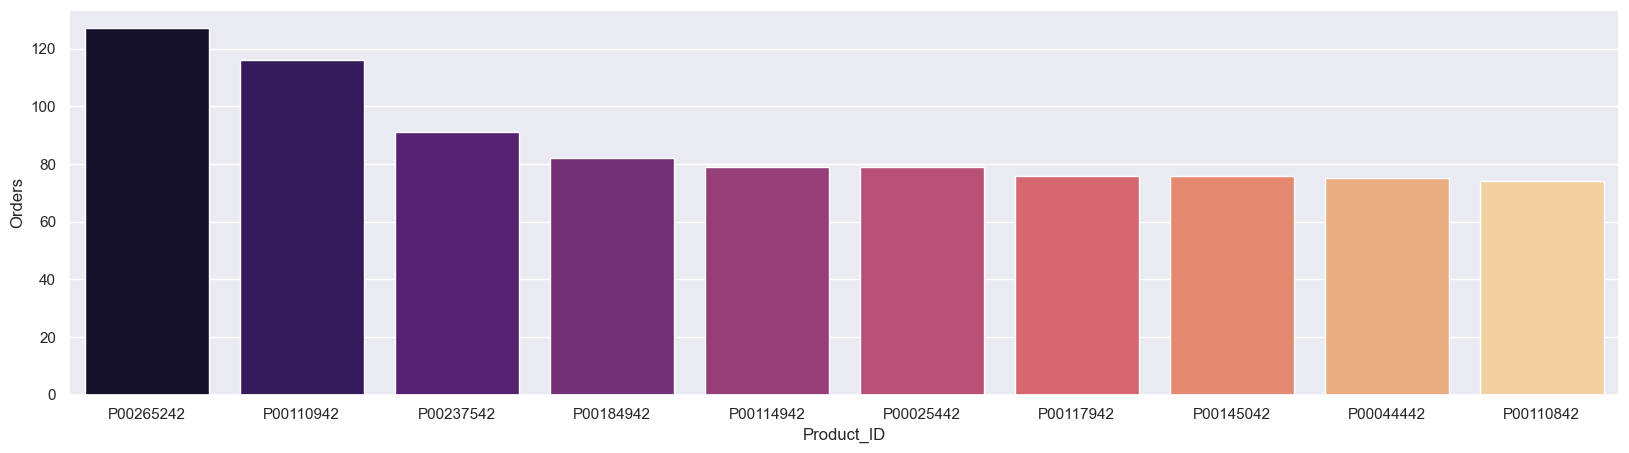

In [23]:
sales_prodid = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_prodid, x = 'Product_ID',y= 'Orders',hue='Product_ID',palette="magma")